# HW1 - Data Exploration and Preparation

#### imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools as it
from plot3d import plot3d
from visualize_clf import visualize_clf
from kNN import kNN

%matplotlib inline

#### Utility functions

In [2]:
def plot_box(series, title, xlabel):
    cleaned_series = series.dropna()
    plt.figure(figsize=(8, 6))
    plt.boxplot(cleaned_series, vert=False)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.grid(alpha=0.5)
    plt.show()

## P1 -  Data Loading and First Look

### Loading the dataset

#### Q1 - shape

In [3]:
dataset = pd.read_csv('virus_data.csv')
dataset.shape

(1250, 24)


#### Q2 - value-count

In [4]:
dataset.value_counts('conversations_per_day')

conversations_per_day
2     214
4     212
3     208
5     158
6     101
1     100
7      76
8      73
10     32
9      23
12     14
13     13
11     10
14      7
15      3
17      2
18      2
16      1
22      1
Name: count, dtype: int64

#### Q3 - columns analysis

In [5]:
dataset.columns

Index(['patient_id', 'age', 'sex', 'weight', 'blood_type', 'num_of_siblings',
       'happiness_score', 'conversations_per_day', 'sugar_levels',
       'sport_activity', 'pcr_date', 'household_income', 'PCR_03', 'PCR_01',
       'PCR_02', 'PCR_04', 'PCR_05', 'PCR_06', 'PCR_07', 'PCR_08', 'PCR_09',
       'PCR_10', 'spread', 'risk'],
      dtype='object')

In [6]:
dataset.head(3) # here we wanted to check what types of values are there for each column :)

patient_id  age sex  weight blood_type  num_of_siblings  happiness_score  \
0         752   27   M    77.2         A+              1.0                8   
1         957   32   M    80.5         A+             11.0                9   
2         879   40   F    76.6         O+              3.0               11   

   conversations_per_day  sugar_levels  sport_activity  ...    PCR_02  \
0                      3            92               1  ...  1.311349   
1                      9            90               2  ... -0.484949   
2                      2           108               1  ... -0.928110   

       PCR_04     PCR_05      PCR_06    PCR_07    PCR_08     PCR_09  \
0  -32.726893   4.467751  165.007823  4.442691  6.948303  -8.798361   
1  110.643771   5.241163  -24.594219  0.823626  9.742164  -6.042282   
2   33.926773  14.006449   17.567186  5.521852  9.697282 -13.140928   

      PCR_10  spread  risk  
0   6.704059       1    -1  
1  14.614062       1     1  
2   0.934598       1     1  

[3 rows x 24 columns]

### Partitioning the data 

#### Q4 - split

In [7]:
id1 = 21
id2 = 9
train = dataset.sample(frac=0.8, random_state=id1 + id2)
test = dataset.drop(train.index)

## P2 - Missing Values and Outliers

#### Q5

In [8]:
def get_missing_data_stats(ds: pd.DataFrame) -> dict:
    """
    Go over the columns of train and test and check for each column how many missing data is there
    Arg: ds - the dataset 
    returns: a list of the names 
    """

    has_nan_columns = {}
    for col_name in ds.columns:
        column = ds[col_name]
        
        nan_mask = pd.isnull(column) # mark for each line if NaN or not
        if nan_mask.any():
            has_nan_columns[col_name] = nan_mask.value_counts()[True]
    return has_nan_columns


print(f'{" ":10}> Train set - missing data')

missing_stats_train = get_missing_data_stats(train)
for col_name, missing in missing_stats_train.items():
    print(f'in column {col_name} - missing: {missing}')   
print('-' * 70)

print(f'{" ":10}> Test set - missing data')

missing_stats_test = get_missing_data_stats(test)
for col_name, missing in missing_stats_test.items():
    print(f'in column {col_name} - missing: {missing}')   
print('-' * 70)

          > Train set - missing data
in column num_of_siblings - missing: 108
in column PCR_03 - missing: 53
----------------------------------------------------------------------
          > Test set - missing data
in column num_of_siblings - missing: 27
in column PCR_03 - missing: 21
----------------------------------------------------------------------


#### Q6

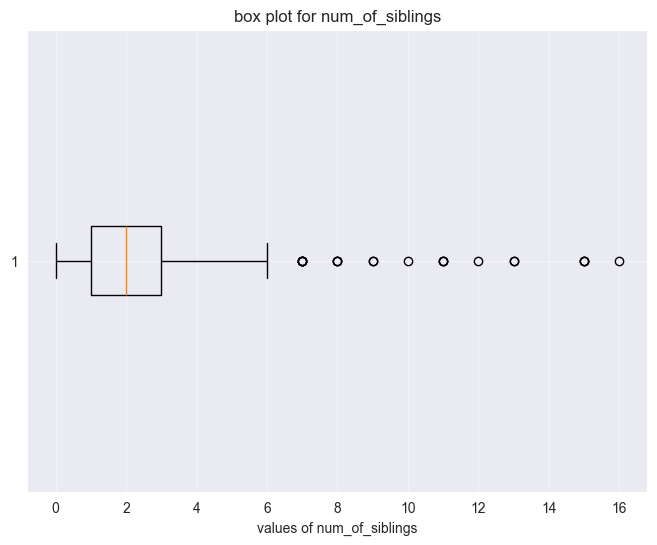

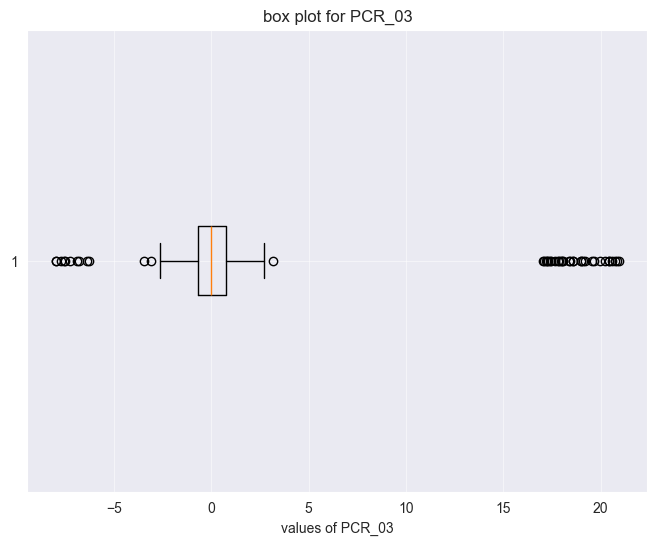

In [9]:
for col_name in missing_stats_train.keys():
    plot_box(train[col_name], f'box plot for {col_name}', f'values of {col_name}')

#### Q7

In [10]:
for col_name in missing_stats_train.keys():
    print(f'The mean of {col_name} is - \t{train[col_name].mean()}')
    print(f'The median of {col_name} is - \t{train[col_name].median()}')

The mean of num_of_siblings is - 	1.9417040358744395
The median of num_of_siblings is - 	2.0
The mean of PCR_03 is - 	0.521187504661258
The median of PCR_03 is - 	-0.0070285297453213


#### Task A

In [11]:
for col_name in missing_stats_train.keys():
    train[col_name].fillna('median')

for col_name in missing_stats_test.keys():
    test[col_name].fillna('median')

## Part 3: Warming up with k-Nearest Neighbors

### Basic data exploration

#### Task B

In [12]:
# create the combinations for the features
opt_featrures = ['PCR_02', 'PCR_03', 'PCR_06', 'PCR_10']
feature_combinations = list(it.combinations(opt_featrures, 2))
feature_combinations

[('PCR_02', 'PCR_03'),
 ('PCR_02', 'PCR_06'),
 ('PCR_02', 'PCR_10'),
 ('PCR_03', 'PCR_06'),
 ('PCR_03', 'PCR_10'),
 ('PCR_06', 'PCR_10')]

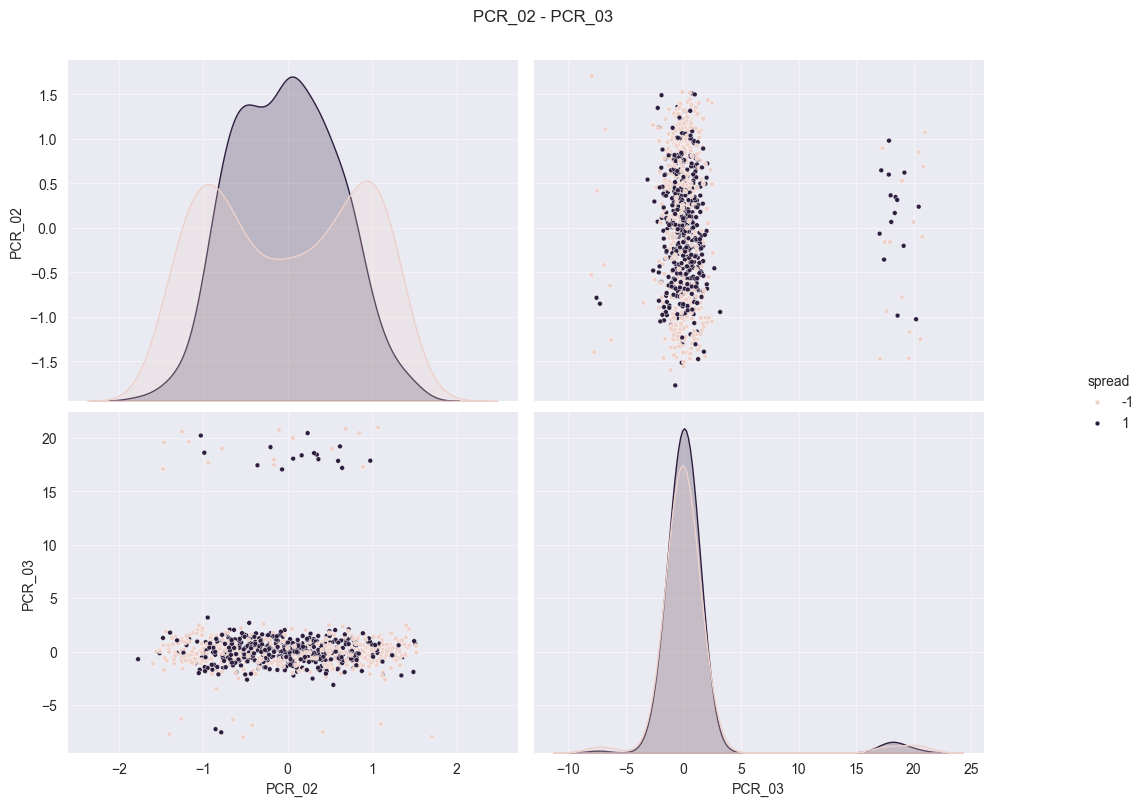

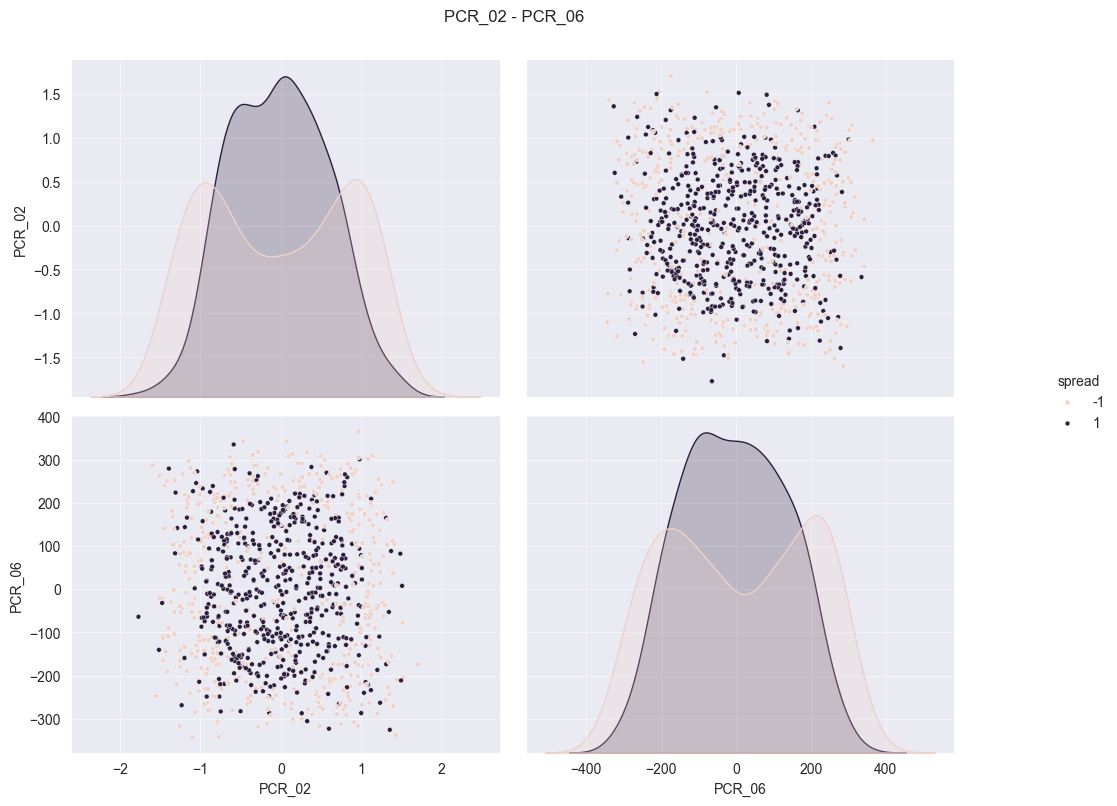

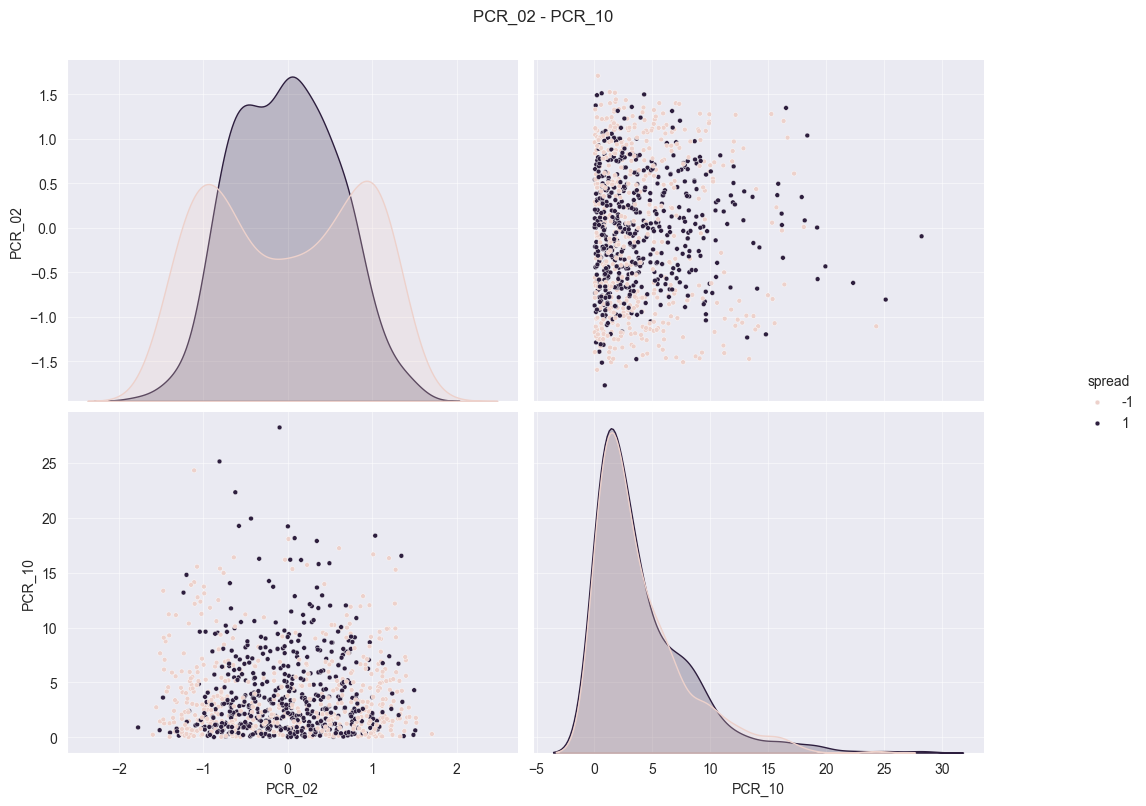

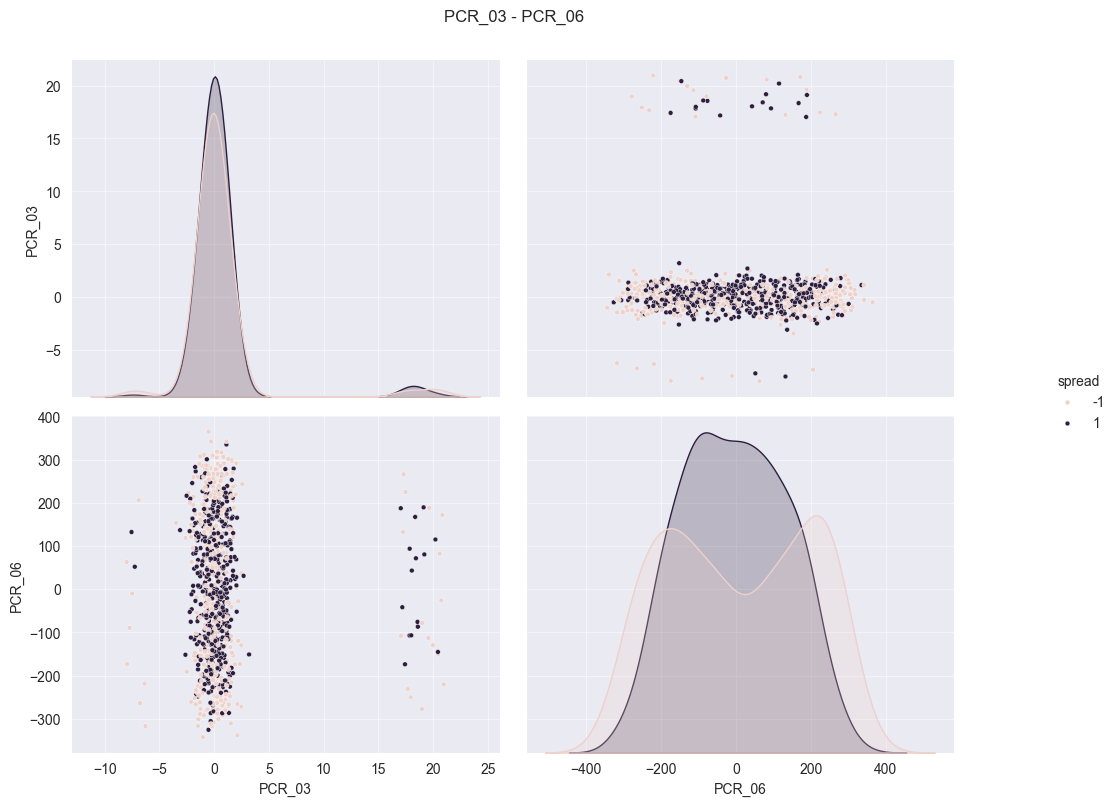

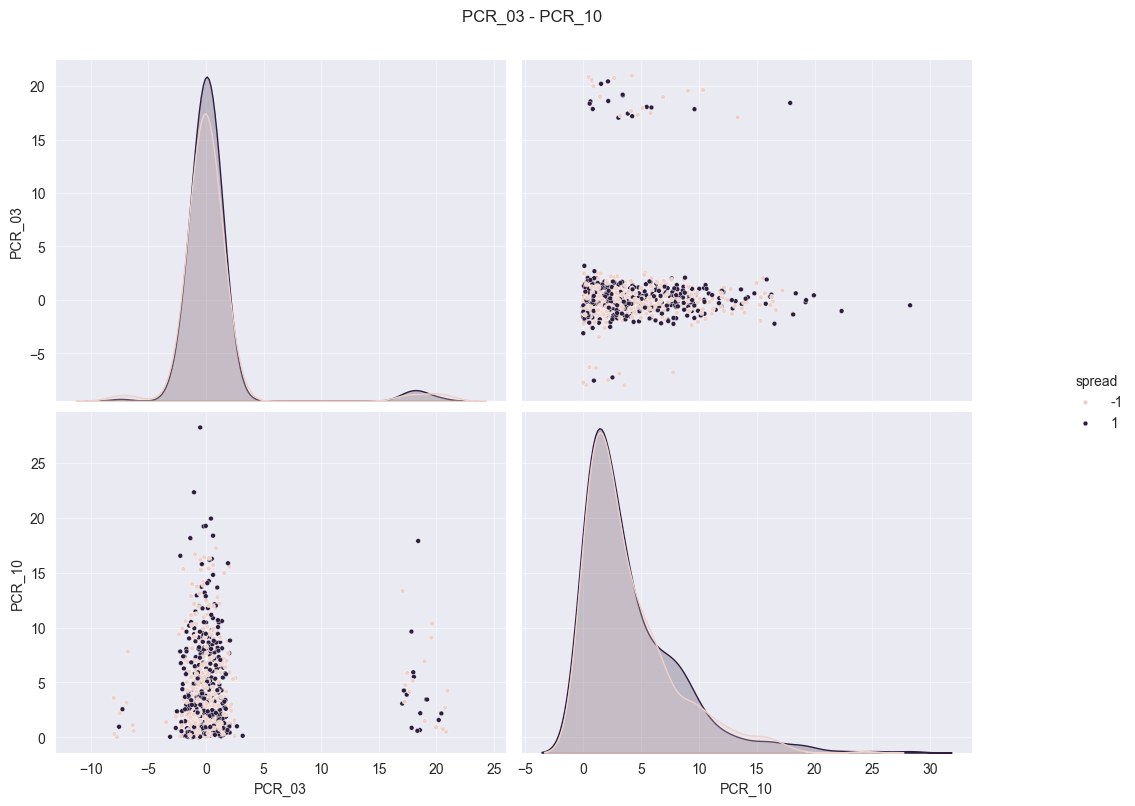

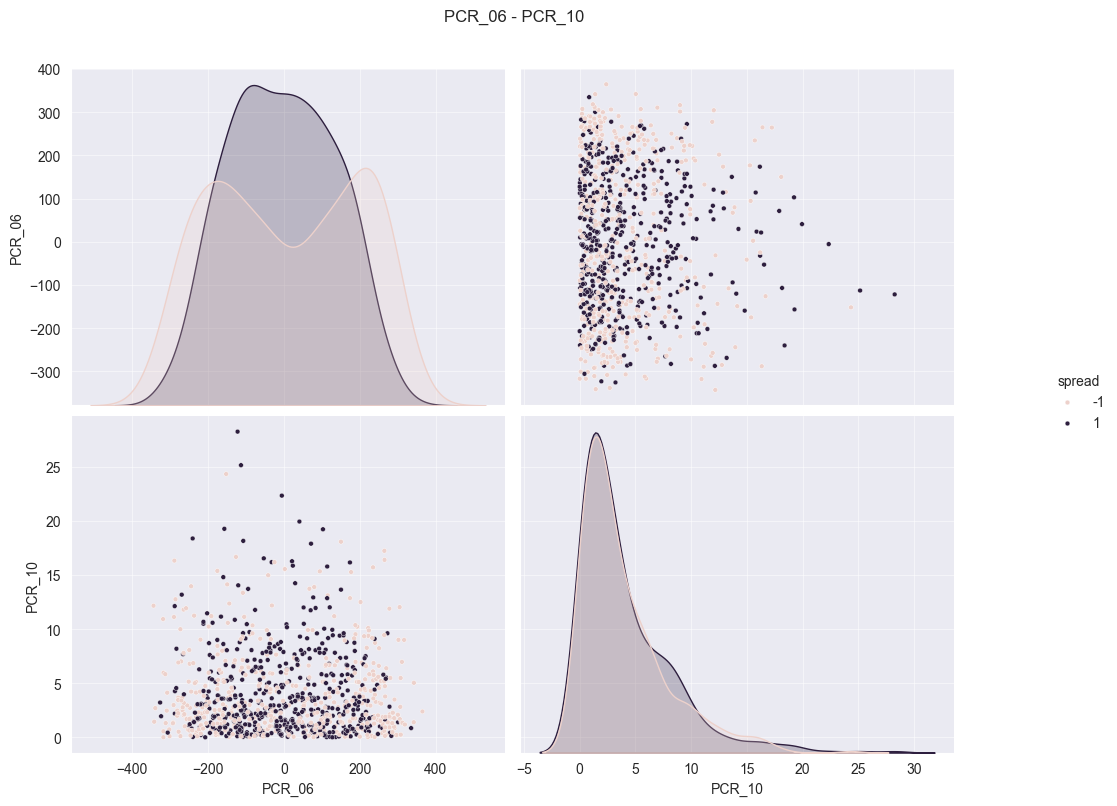

In [13]:
for col1, col2 in feature_combinations:
    data = train[[col1, col2, 'spread']]
    g = sns.pairplot(data, plot_kws={'s': 12}, hue='spread')
    g.fig.suptitle(f'{col1} - {col2}', y=1.04)

    for ax in np.ravel(g.axes):
        ax.grid(alpha=0.5)
    
    g.fig.set_size_inches(12, 8)

#### Q8 - in docx

#### Q9

In [14]:
for col1, col2 in feature_combinations:
    data = train[[col1, col2, 'spread']]
    corr = data.corr()
    print(f'{col1}x{col2} - correlation:\n {corr}')
    print()

PCR_02xPCR_03 - correlation:
           PCR_02    PCR_03    spread
PCR_02  1.000000 -0.003453 -0.005374
PCR_03 -0.003453  1.000000  0.006577
spread -0.005374  0.006577  1.000000

PCR_02xPCR_06 - correlation:
           PCR_02    PCR_06    spread
PCR_02  1.000000 -0.037986 -0.005374
PCR_06 -0.037986  1.000000 -0.038852
spread -0.005374 -0.038852  1.000000

PCR_02xPCR_10 - correlation:
           PCR_02    PCR_10    spread
PCR_02  1.000000  0.003659 -0.005374
PCR_10  0.003659  1.000000  0.015821
spread -0.005374  0.015821  1.000000

PCR_03xPCR_06 - correlation:
           PCR_03    PCR_06    spread
PCR_03  1.000000 -0.014382  0.006577
PCR_06 -0.014382  1.000000 -0.038852
spread  0.006577 -0.038852  1.000000

PCR_03xPCR_10 - correlation:
           PCR_03    PCR_10    spread
PCR_03  1.000000  0.020397  0.006577
PCR_10  0.020397  1.000000  0.015821
spread  0.006577  0.015821  1.000000

PCR_06xPCR_10 - correlation:
           PCR_06    PCR_10    spread
PCR_06  1.000000 -0.010630 -0.038852
P

### k-NN implementation 

#### Task C - in kNN.py

#### Q10 - in docx

#### Task D

In [15]:
# choose train set
featrues = ('PCR_06', 'PCR_02')

df_train = train[[*featrues, 'spread']]
X_train = df_train[[*featrues]]
y_train = df_train['spread']

# choose test set
df_test = test[[*featrues, 'spread']]
X_test = df_test[[*featrues]]
y_test = df_test['spread']

#### Q11

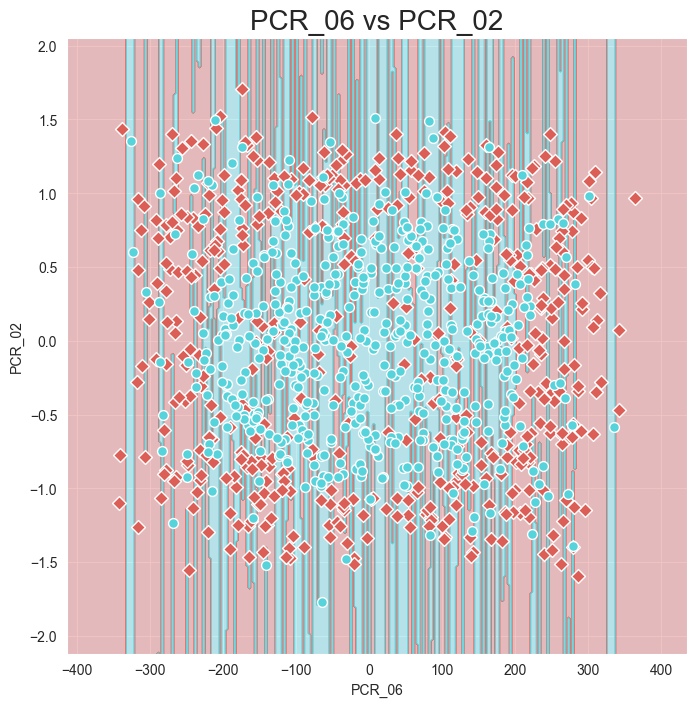

train score: 1.0
test score: 0.608


In [16]:
kNN_62 = kNN(n_neighbors=1)
kNN_62.fit(X_train, y_train)
visualize_clf(kNN_62, X_train, y_train, f'{featrues[0]} vs {featrues[1]}', *featrues)
print(f'train score: {kNN_62.score(X_train, y_train)}')
print(f'test score: {kNN_62.score(X_test, y_test)}')

### Data Normalization

#### Q12

In [17]:
from sklearn.preprocessing import MinMaxScaler

# using the MinMax Scaler of sikit learn to normalize the data into [-1, 1] interval
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)

scaler.fit(X_test)
X_test_norm = scaler.transform(X_test)

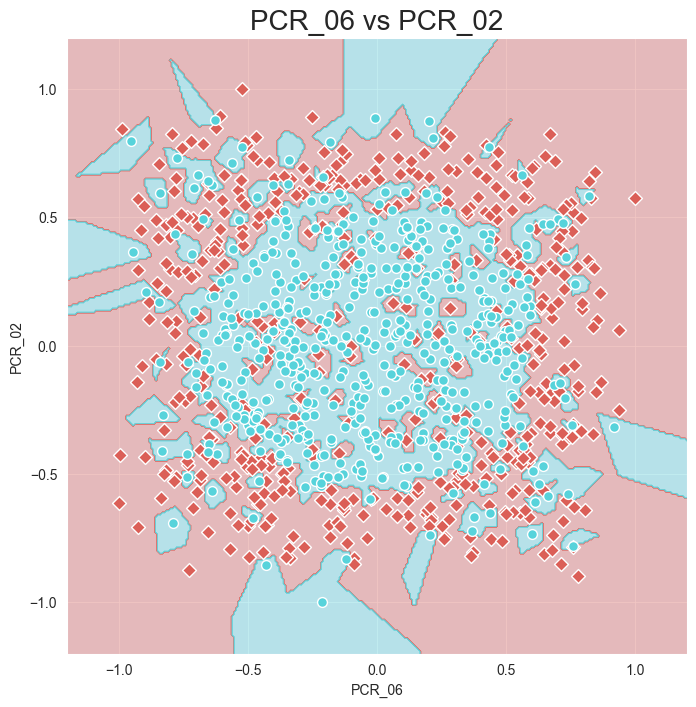

train score: 1.0
test score: 0.648


In [18]:
kNN_62.fit(X_train_norm, y_train)
visualize_clf(kNN_62, X_train_norm, y_train, f'{featrues[0]} vs {featrues[1]}', *featrues)
print(f'train score: {kNN_62.score(X_train_norm, y_train)}')
print(f'test score: {kNN_62.score(X_test_norm, y_test)}')

#### Q13

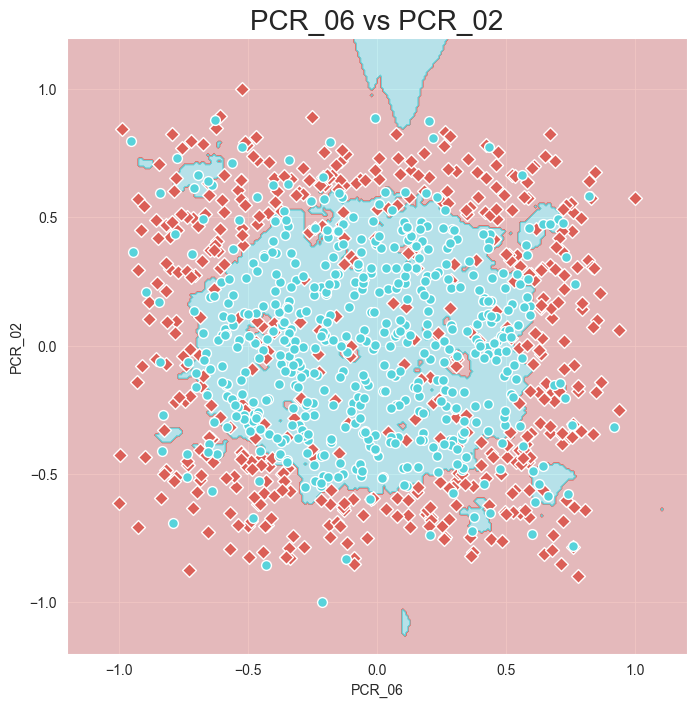

train score: 0.826
test score: 0.708


In [19]:
kNN_62 = kNN(n_neighbors=5)
kNN_62.fit(X_train_norm, y_train)
visualize_clf(kNN_62, X_train_norm, y_train, f'{featrues[0]} vs {featrues[1]}', *featrues)
print(f'train score: {kNN_62.score(X_train_norm, y_train)}')
print(f'test score: {kNN_62.score(X_test_norm, y_test)}')

## Part 4: Data Exploration

#### Task E

In [20]:
# add the special property
train['SpecialProperty'] = train['blood_type'].isin(['O+', 'B+'])
test['SpecialProperty'] = test['blood_type'].isin(['O+', 'B+'])

# remove the blood_type column
train = train.drop(columns='blood_type')
test = test.drop(columns='blood_type')

### Univariate Analysis 

In [21]:
cont_feat = ['weight']

for i in range(1, 10):
    cont_feat.append(f'PCR_0{i}')
cont_feat.append('PCR_10')

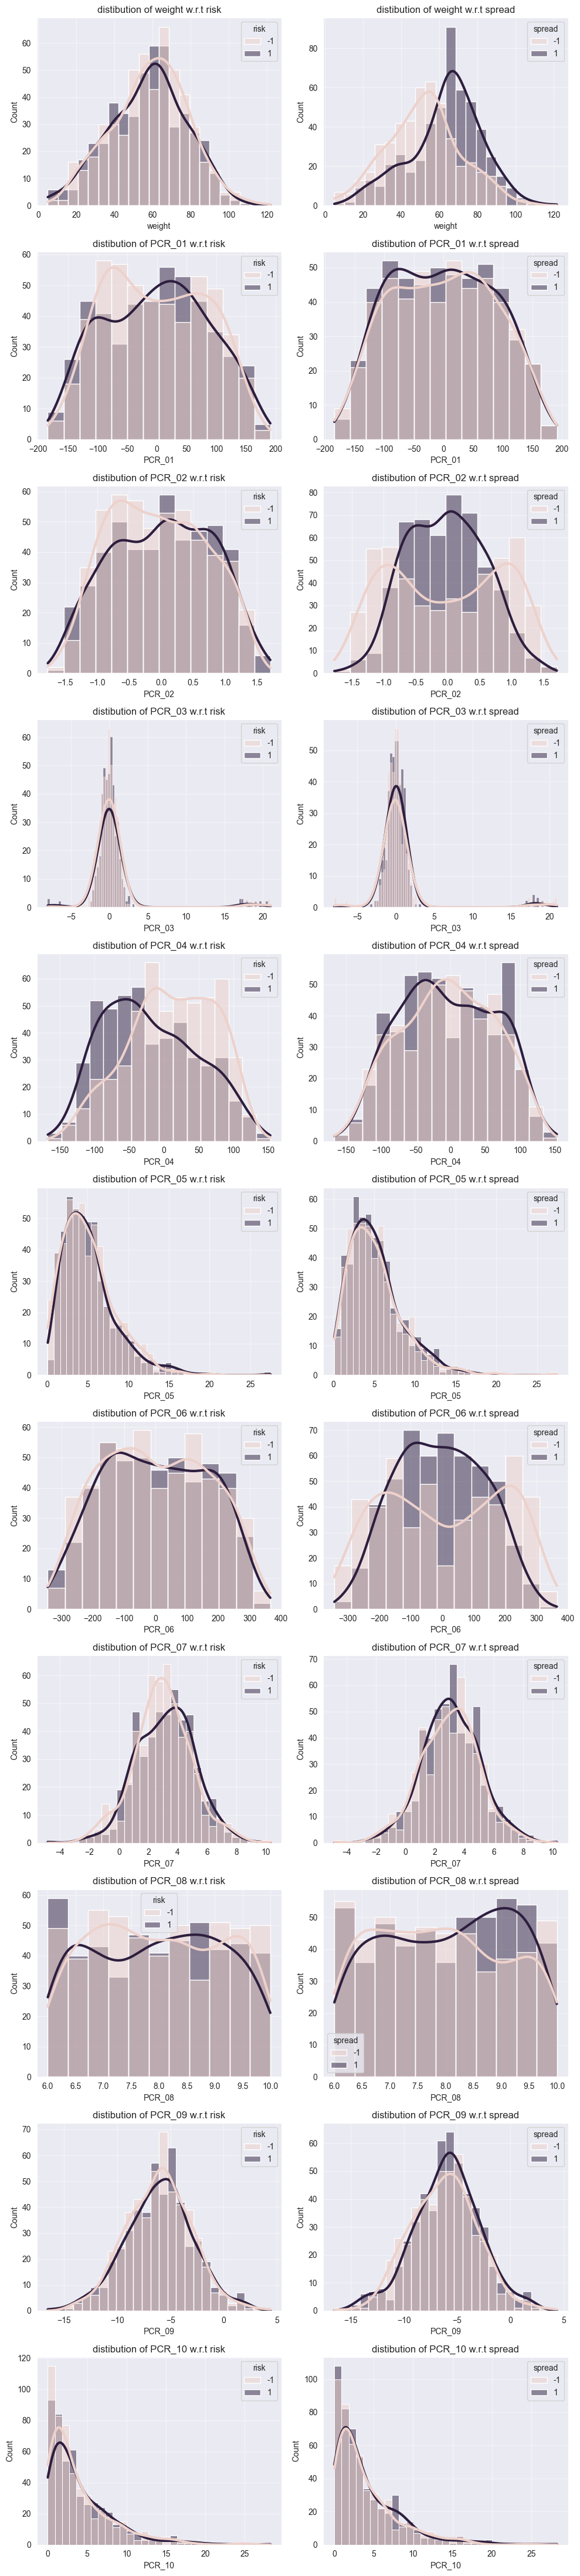

In [22]:
col_names = cont_feat
cols, rows = (2, len(col_names)) 
plt.figure(figsize=(5 * cols, 4 * rows))  

for row in range(rows): 
    column = col_names[row] 
    for j, cls in enumerate(["risk", "spread"]): 
        plt.subplot(rows, cols, row * cols + 1 + j) 
        isContinuous = "float" in train[column].dtype.name
        sns.histplot(data=train, x=column, hue=cls, line_kws={"linewidth": 3}, 
                        kde=isContinuous, multiple="layer" if isContinuous else "dodge").set(title=f'distibution of {column} w.r.t {cls}')
        plt.grid(alpha=0.5) 

plt.tight_layout()

#### Q15 - in docx

#### Q16 - in docx

### Bivariate Analysis

#### Q17

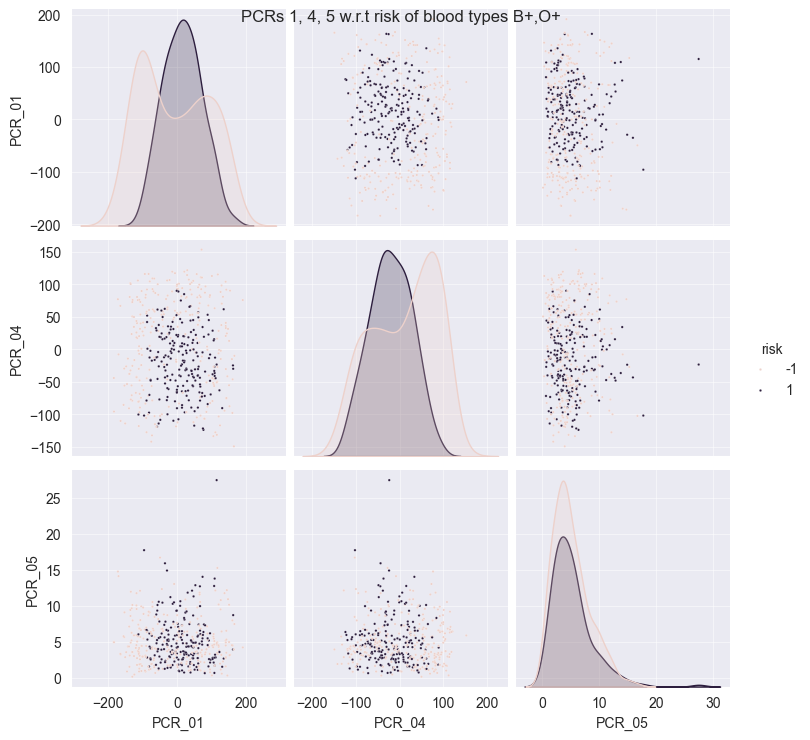

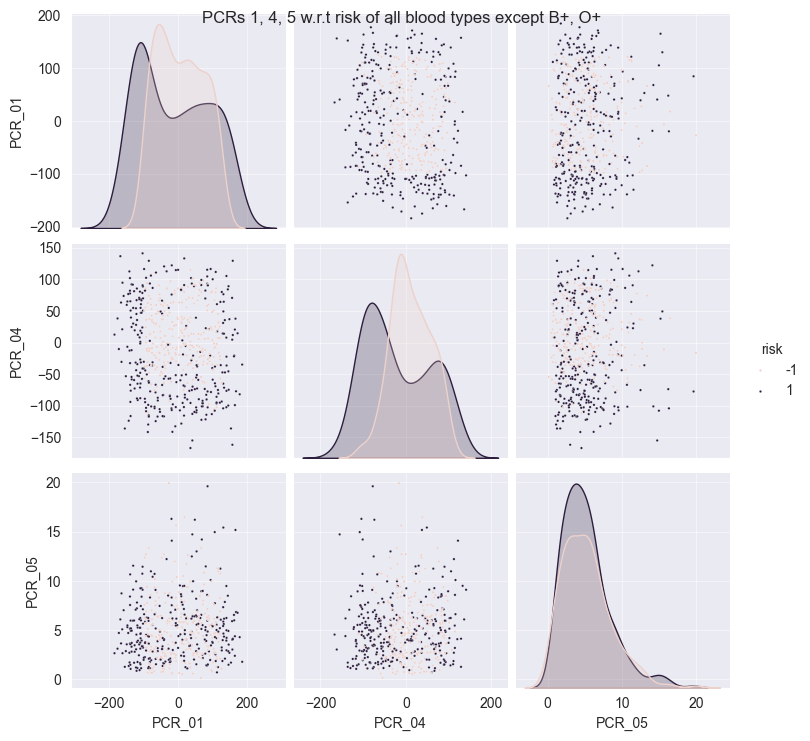

In [23]:
# filter data
risk_data = train[[*[f'PCR_0{i}' for i in (1, 4, 5)], 'risk', 'SpecialProperty']]

# split data
prop_true_data, prop_false_data = risk_data[mask := risk_data['SpecialProperty']], risk_data[~mask]

# plot graphs
# Graph for SpecialProperty
g = sns.pairplot(prop_true_data[prop_true_data.filter(like='PCR').columns.tolist() + ['risk']], plot_kws={'s': 3}, hue='risk')
g.figure.suptitle('PCRs 1, 4, 5 w.r.t risk of blood types B+,O+')
for ax in g.axes.flatten():
    ax.grid(alpha=0.5)

# Graph for no SpecialProperty
g = sns.pairplot(prop_false_data[prop_false_data.filter(like='PCR').columns.tolist() + ['risk']], plot_kws={'s': 3}, hue='risk')
g.figure.suptitle('PCRs 1, 4, 5 w.r.t risk of all blood types except B+, O+')

# Add grid to each subplot
for ax in g.axes.flatten():
    ax.grid(alpha=0.5)

#### Q18

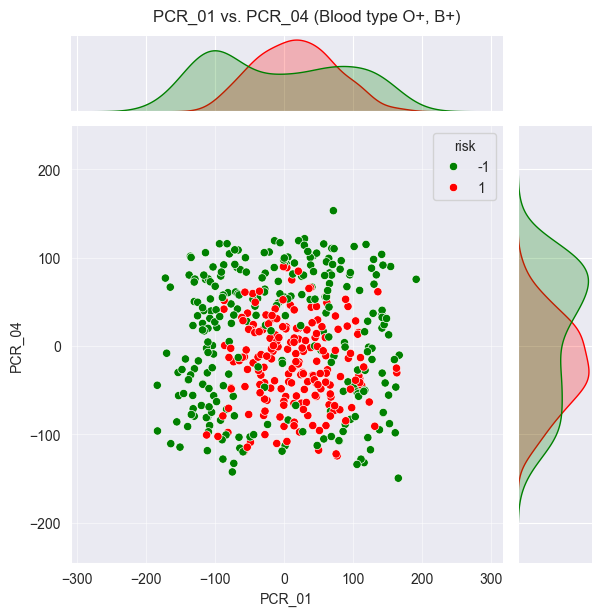

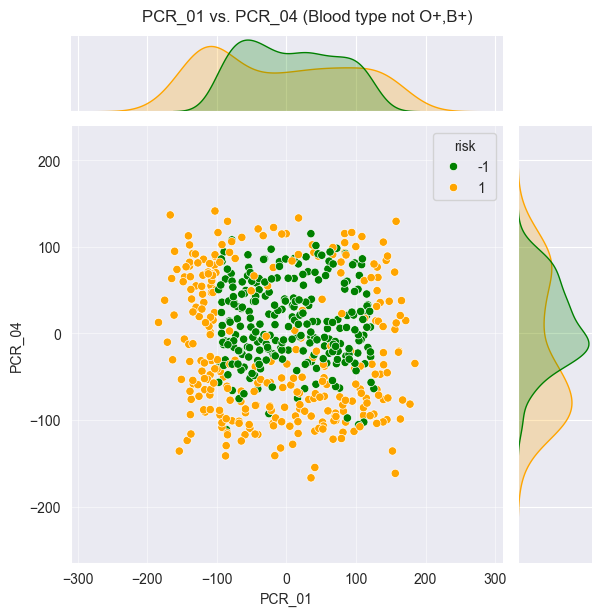

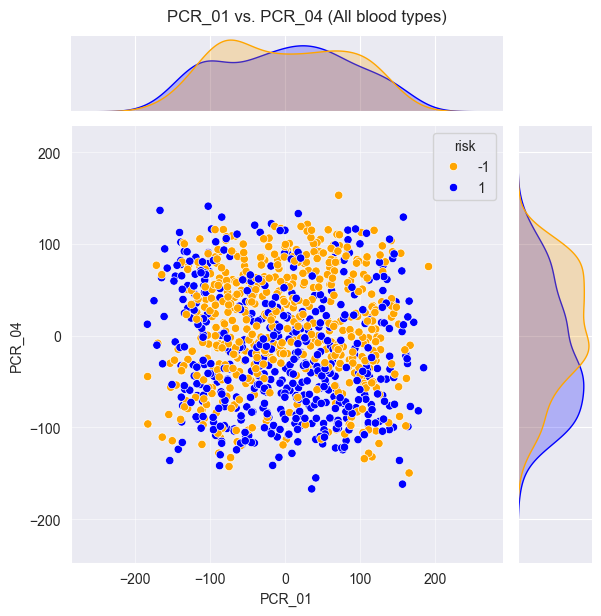

In [24]:
q17_features = ('PCR_01', 'PCR_04')

first_plot = prop_true_data[['risk', *q17_features]]
second_plot = prop_false_data[['risk', *q17_features]]
third_plot = risk_data[['risk', *q17_features]]

# Add grid to each subplot
for ax in g.axes.flatten():
    ax.grid(alpha=0.5)# Create the three jointplots
g1 = sns.jointplot(data=first_plot, x=q17_features[0], y=q17_features[1], hue='risk', palette=['green', 'red'])
g2 = sns.jointplot(data=second_plot, x=q17_features[0], y=q17_features[1], hue='risk', palette=['green', 'orange'])
g3 = sns.jointplot(data=third_plot, x=q17_features[0], y=q17_features[1], hue='risk', palette=['orange', 'blue'])

# Set titles
g1.fig.suptitle(f'{q17_features[0]} vs. {q17_features[1]} (Blood type O+, B+)', y=1.02)
g2.fig.suptitle(f'{q17_features[0]} vs. {q17_features[1]} (Blood type not O+,B+)', y=1.02)
g3.fig.suptitle(f'{q17_features[0]} vs. {q17_features[1]} (All blood types)', y=1.02)

# join grids
g1.ax_joint.grid(alpha=0.5)
g2.ax_joint.grid(alpha=0.5)
g3.ax_joint.grid(alpha=0.5)

# Move the figures manually
plt.show()
# I hope you like the colors >_<

#### Q19

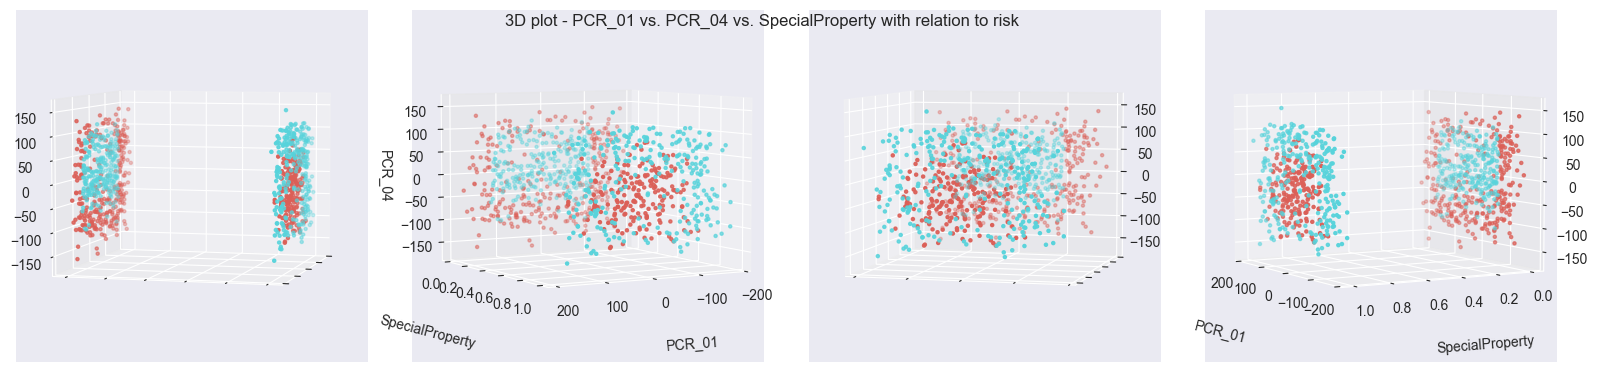

In [25]:
df = risk_data[[*q17_features, 'risk', 'SpecialProperty']]
plot3d(df, q17_features[0], 'SpecialProperty',  q17_features[1], title=f'3D plot - {q17_features[0]} vs. {q17_features[1]} vs. SpecialProperty with relation to risk', hue='risk', s=5)

## Part 5: More Data Normalization

#### Q20, Q21, Q22 - in docx

#### Task F

In [26]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler_mm = MinMaxScaler(feature_range=(-1, 1))
scaler_z = StandardScaler()

mm_scale_columns = ['PCR_01', 'PCR_02', 'PCR_04', 'PCR_06', 'PCR_08']
z_scale_columns = ['PCR_03', 'PCR_05', 'PCR_07', 'PCR_09', 'PCR_10']

scaler_mm.fit(train[mm_scale_columns])
train[mm_scale_columns] = scaler_mm.transform(train[mm_scale_columns])
scaler_mm.fit(test[mm_scale_columns])
test[mm_scale_columns] = scaler_mm.transform(test[mm_scale_columns])

scaler_z.fit(train[z_scale_columns])
train[z_scale_columns] = scaler_z.transform(train[z_scale_columns])
scaler_z.fit(test[z_scale_columns])
test[z_scale_columns] = scaler_z.transform(test[z_scale_columns])

##### Check normalization successfull - Not part of question :)

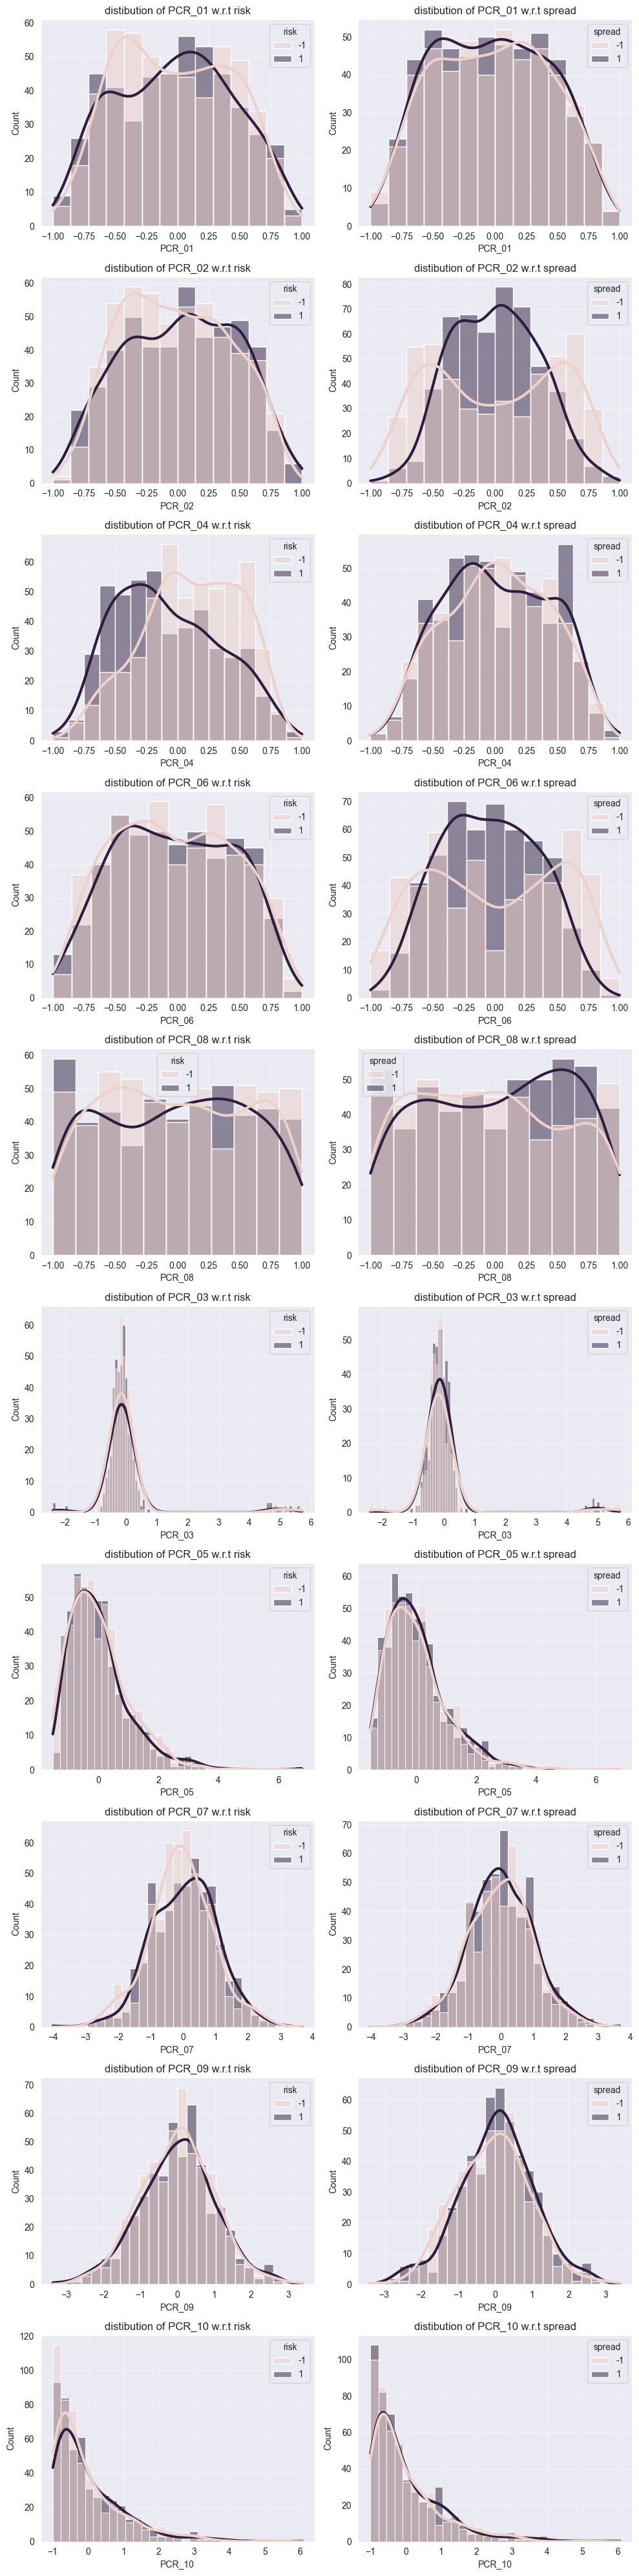

In [27]:
cont_feat = mm_scale_columns + z_scale_columns

col_names = cont_feat
cols, rows = (2, len(col_names)) 
plt.figure(figsize=(5 * cols, 4 * rows))  

for row in range(rows): 
    column = col_names[row] 
    for j, cls in enumerate(["risk", "spread"]): 
        plt.subplot(rows, cols, row * cols + 1 + j) 
        isContinuous = "float" in train[column].dtype.name
        sns.histplot(data=train, x=column, hue=cls, line_kws={"linewidth": 3}, 
                        kde=isContinuous, multiple="layer" if isContinuous else "dodge").set(title=f'distibution of {column} w.r.t {cls}')
        plt.grid(alpha=0.5) 

plt.tight_layout()

#### Q23 - in docx

## Part 6: Data Preparation Pipline

#### Q24 - in docx

#### Task H

In [28]:
from prepare import prepare_data
import csv

# Prepare training set according to itself 
train_df_prepared = prepare_data(train, train) 

# Prepare test set according to the raw training set 
test_df_prepared = prepare_data(train, test)

# train_df_prepared.to_csv('train_prepared.csv')
# test_df_prepared.to_csv('test_prepared.csv')

In [31]:
train_df_prepared.head(5)

patient_id  age sex  weight  num_of_siblings  happiness_score  \
84          115    5   F    23.8              1.0                6   
855         371   18   F    47.5              1.0                9   
824         165   22   M    61.2              2.0                6   
189         712   10   M    54.1              1.0                8   
74          569    6   M     6.2              NaN                9   

     conversations_per_day  sugar_levels  sport_activity    pcr_date  ...  \
84                       5            74               5  2021-09-07  ...   
855                      2            90               1  2021-04-05  ...   
824                      2           110               0  2022-01-13  ...   
189                      4            61               1  2022-05-06  ...   
74                       3            65               1  2022-11-23  ...   

       PCR_04    PCR_05    PCR_06    PCR_07    PCR_08    PCR_09    PCR_10  \
84  -0.781670 -0.168940 -0.443408  0.382866 -0.492839 -0.509126 -0.921020   
855 -0.221766 -0.624639  0.108136  0.782083 -0.177934 -0.997129 -0.146990   
824 -0.341244  0.253819 -0.325742  0.287865 -0.238630  0.630420  1.780116   
189  0.626223 -0.094749  0.615771  0.847473  0.367516  1.538237  0.075502   
74  -0.162519  0.801790 -0.352231 -1.290872 -0.802077 -2.007930  0.539563   

     spread  risk  SpecialProperty  
84       -1    -1             True  
855       1     1             True  
824      -1     1             True  
189      -1     1            False  
74       -1     1             True  

[5 rows x 24 columns]

In [30]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler_mm = MinMaxScaler(feature_range=(-1, 1))
scaler_z = StandardScaler()

mm_scale_columns = ['PCR_01', 'PCR_02', 'PCR_04', 'PCR_06', 'PCR_08']
z_scale_columns = ['PCR_03', 'PCR_05', 'PCR_07', 'PCR_09', 'PCR_10']

# scaler_mm.fit(train[mm_scale_columns])
# train[mm_scale_columns] = scaler_mm.transform(train[mm_scale_columns])
# scaler_mm.fit(test[mm_scale_columns])
# test[mm_scale_columns] = scaler_mm.transform(test[mm_scale_columns])

# scaler_z.fit(train[z_scale_columns])
# train[z_scale_columns] = scaler_z.transform(train[z_scale_columns])
# scaler_z.fit(test[z_scale_columns])
# test[z_scale_columns] = scaler_z.transform(test[z_scale_columns])

cont_feat = mm_scale_columns + z_scale_columns

train_z = train.copy()
scaler_z.fit(train_z[cont_feat])
train_z[z_scale_columns] = scaler_z.transform(train_z[z_scale_columns])

train_mm = train.copy()
scaler_mm.fit(train_mm[cont_feat])
train_mm[mm_scale_columns] = scaler_mm.transform(train_mm[mm_scale_columns])

col_names = cont_feat

cols, rows = (4, len(col_names)) 
plt.figure(figsize=(5 * cols, 4 * rows))  

for row in range(rows): 
    column = col_names[row] 
    for j, cls in enumerate(["risk", "spread"]): 
        plt.subplot(rows, cols, row * cols + 1 + j) 
        isContinuous = "float" in train[column].dtype.name
        sns.histplot(data=train_mm, x=column, hue=cls, line_kws={"linewidth": 3}, 
                        kde=isContinuous, multiple="layer" if isContinuous else "dodge").set(title=f'distibution minmax of {column} w.r.t {cls}')
        plt.grid(alpha=0.5) 

        plt.subplot(rows, cols, row * cols + 2 + j) 
        isContinuous = "float" in train[column].dtype.name
        sns.histplot(data=train_z, x=column, hue=cls, line_kws={"linewidth": 3}, 
                        kde=isContinuous, multiple="layer" if isContinuous else "dodge").set(title=f'distibution z score of {column} w.r.t {cls}')
        plt.grid(alpha=0.5) 

plt.tight_layout()

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- PCR_01
- PCR_02
- PCR_04
- PCR_06
- PCR_08
